# Reinforcement Learning

# Dynamic programming

This notebook presents **policy iteration** and **value iteration** for finding the optimal policy.

Note that these techniques require the enumeration of all states and thus are restricted to some environments.

In [1]:
import numpy as np

In [2]:
from model import Walk, Maze, TicTacToe, Nim
from agent import Agent
from dp import PolicyEvaluation, PolicyIteration, ValueIteration

## Maze

In [3]:
maze = Maze()
# set parameters
maze_map = np.load('maze.npy')
maze.set_parameters(maze_map, (1,0), [(1,20)])
# init
maze = Maze()

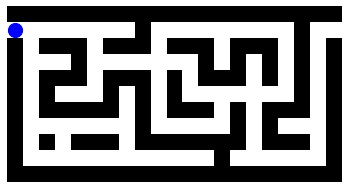

In [4]:
maze.display()

## Policy Evaluation

In [5]:
# random policy
agent = Agent(maze)
policy = agent.policy

In [6]:
algo = PolicyEvaluation(maze, policy)
values = algo.evaluate_policy()

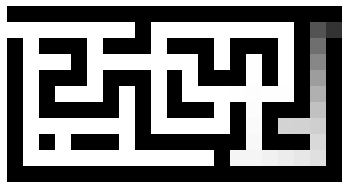

In [7]:
maze.display_values(values)

In [8]:
new_policy = algo.improve_policy()

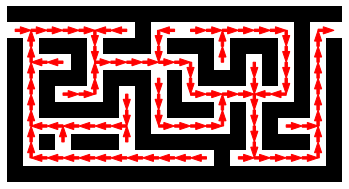

In [9]:
maze.display_policy(new_policy)

In [10]:
agent = Agent(maze, new_policy)
stop, states, rewards = agent.get_episode()

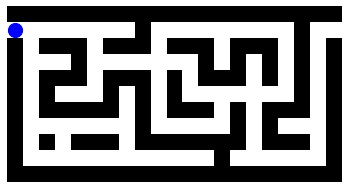

In [11]:
animation = maze.display(states)

In [12]:
animation

## Policy Iteration

In general, several policy improvements are necessary. This is **policy iteration**.

In [13]:
algo = PolicyIteration(maze, verbose=True)

Convergence after 3 iterations.


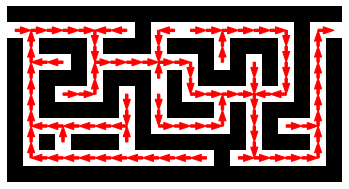

In [14]:
policy = algo.get_optimal_policy()
maze.display_policy(policy)

## Value Iteration

The optimal policy can be found more directly through **Value iteration**.

In [15]:
algo = ValueIteration(maze, verbose=True)

Convergence after 55 iterations of Bellman's optimality equation.


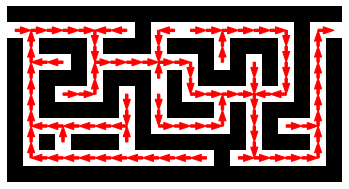

In [16]:
algo.get_optimal_values()
policy = algo.improve_policy()
maze.display_policy(policy)

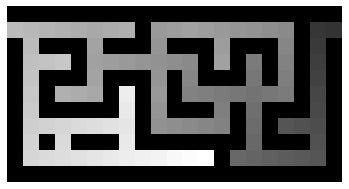

In [17]:
maze.display_values(algo.values)

## Walk

In [18]:
walk = Walk()

In [19]:
walk.Rewards

{(1, 1): 1, (1, 5): 2, (5, 5): 3, (5, 1): 4}

In [20]:
# random policy
agent = Agent(walk)
policy = agent.policy

In [21]:
algo = ValueIteration(walk, gamma=0.9, n_iter_eval=1000)

In [22]:
algo.get_optimal_values()

In [23]:
values = algo.values

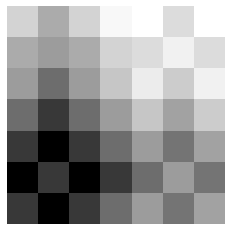

In [24]:
walk.display_values(values)

In [25]:
policy = algo.improve_policy()

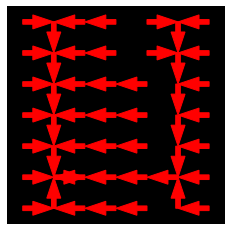

In [26]:
walk.display_policy(policy)

## Tic-Tac-Toe

In [27]:
Game = TicTacToe

In [28]:
game = Game()

In [29]:
algo = ValueIteration(game)

In [30]:
algo.get_optimal_values()

In [31]:
perfect_player = algo.improve_policy()

In [32]:
# perfect player vs. random player
game = Game()
agent = Agent(game, perfect_player)
agent.get_game_stats()

[98, 2, 0]

In [33]:
# perfect adversary
perfect_adversary = algo.improve_policy(player=-1)

In [34]:
# random player vs perfect player
game = Game(adversary_policy=perfect_adversary)
agent = Agent(game)
agent.get_game_stats()

[0, 20, 80]

In [35]:
# perfect players
game = Game(adversary_policy=perfect_adversary)
agent = Agent(game, perfect_player)
agent.get_game_stats()

[0, 100, 0]

## To do

* Observe and interpret the optimal value function.
* Apply dynamic programming to Nim and explain the results.

In [36]:
# optimal value function
values = algo.values

In [37]:
np.unique(values, return_counts=True)

(array([-1.,  0.,  1.]), array([1158, 2422, 2310], dtype=int64))

Nim

In [54]:
# optimal value of the initial state
i = algo.get_state_id(game.state)
algo.values[i]

0.0

In [55]:
Game = Nim

In [56]:
game = Game()

In [57]:
algo = ValueIteration(game)

In [58]:
# perfect player vs. random player
game = Game()
agent = Agent(game)
agent.get_game_stats()

[39, 0, 61]

In [61]:
algo.get_optimal_values()

In [62]:
perfect_player = algo.improve_policy()

In [63]:
# perfect player vs. random player
game = Game()
agent = Agent(game, perfect_player)
agent.get_game_stats()

[100, 0, 0]

In [64]:
# optimal value function
values = algo.values

In [65]:
np.unique(values, return_counts=True)

(array([-1.,  0.,  1.]), array([384,   2, 382], dtype=int64))

In [66]:
# optimal value of the initial state
i = algo.get_state_id(game.state)
algo.values[i]

0.0

In [67]:
perfect_adversary = algo.improve_policy(player=-1)

In [68]:
# perfect player vs. random player
game = Game(adversary_policy=perfect_adversary)
agent = Agent(game, perfect_player)
agent.get_game_stats()

[0, 0, 100]

In [72]:
# perfect player vs. random player
game = Game(adversary_policy=perfect_adversary, play_first=False)
agent = Agent(game, perfect_player)
agent.get_game_stats()

[100, 0, 0]